# Assignment 5: Morphological & Color image processing

In [4]:
#to import all the necessary libraries:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from skimage import data
from skimage import filters

## Exercise 1: Global and local Thresholding

(a) Use the sample image of the camera man ($\texttt{data.camera()}$) and display it. Determine an appropriate threshold in intensity (counts) for the image by displaying the histogram. Display the image again using this threshold. Why have you chosen this threshold? 

In [17]:
img = data.camera()
imggr = ski.color.rgb2gray(img)
imggr_threshold = imggr > 50
imggr_threshold = ski.util.img_as_ubyte(imggr_threshold)

Text(0.5, 1.0, 'Histogram')

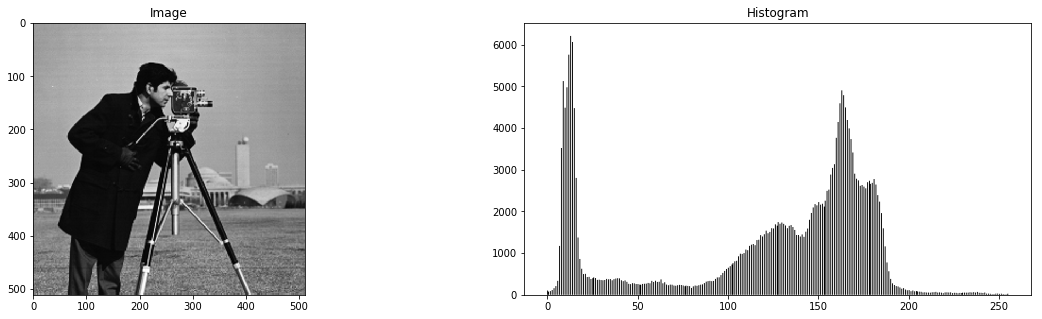

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
ax = axes.ravel()

ax[0].imshow(imggr, cmap='gray')
ax[0].set_title("Image")
ax[1].hist(imggr.ravel(), bins=500, histtype='stepfilled', color='black')
ax[1].set_title("Histogram")

Text(0.5, 1.0, 'Threshold Histogram')

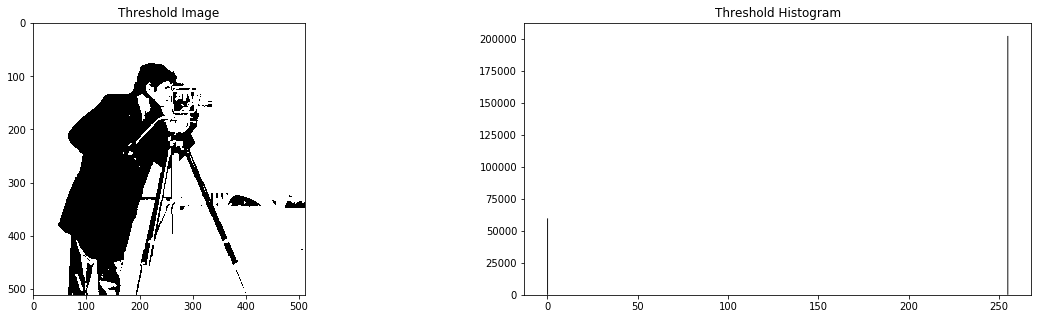

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
ax = axes.ravel()

ax[0].imshow(imggr_threshold, cmap='gray')
ax[0].set_title("Threshold Image")
ax[1].hist(imggr_threshold.ravel(),
           bins=500,
           histtype='stepfilled',
           color='black')
ax[1].set_title("Threshold Histogram")

(b) Use the threshold-functions of the $\texttt{skimage.filters}$-Module $\texttt{threshold$\_$minimum}$, $\texttt{threshold$\_$mean}$, and $\texttt{threshold$\_$otsu}$ to obtain a threshold and display the image with this threshold. Compare the different results with the image in (a). Explain the idea behind the three different threshold methods.

In [20]:
imggr_minimum = imggr > filters.threshold_minimum(imggr)
imggr_mean = imggr > filters.threshold_mean(imggr)
imggr_otsu = imggr > filters.threshold_otsu(imggr)

Text(0.5, 1.0, 'Otsu Threshold')

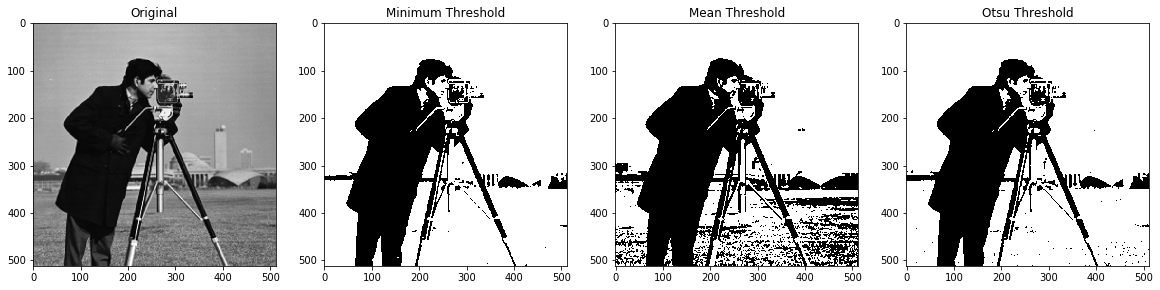

In [21]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
ax = axes.ravel()

ax[0].imshow(imggr, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(imggr_minimum, cmap='gray')
ax[1].set_title("Minimum Threshold")
ax[2].imshow(imggr_mean, cmap='gray')
ax[2].set_title("Mean Threshold")
ax[3].imshow(imggr_otsu, cmap='gray')
ax[3].set_title("Otsu Threshold")

(c) Read-in the sample image $\texttt{data.page()}$ and display it. Use a global threshold (for the entire image) to create a binary image. What do you recognize?

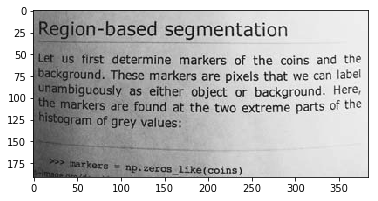

In [24]:
img_page = data.page()
imggr_page = ski.color.rgb2gray(img_page)
plt.imshow(imggr_page, cmap='gray')

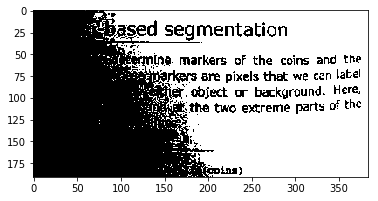

In [26]:
threshold_mean_page = imggr_page > filters.threshold_mean(imggr_page)
plt.imshow(threshold_mean_page, cmap='gray')

(d) Try a local thresholding method. What is the difference to a global threshold. Explain the method. Compare the results of global and local thresholding.

In [54]:
local_threshold_page = imggr_page > filters.threshold_local(imggr_page, 31, offset=10)

Text(0.5, 1.0, 'Minimum Threshold')

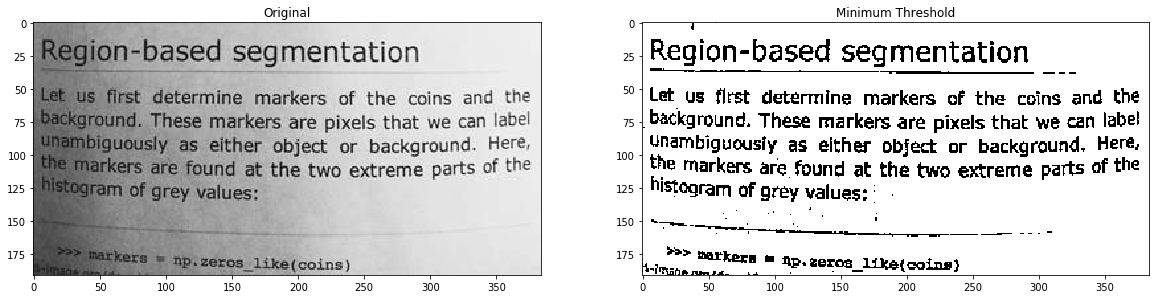

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
ax = axes.ravel()

ax[0].imshow(imggr_page, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(local_threshold_page, cmap='gray')
ax[1].set_title("Minimum Threshold")

## Exercise 2:


Read in the image $\texttt{sunspot.png}$, an image of a historical sunspot drawing and convert it into a binary image using a threshold. Perform the following morphological operations on the image:

(a) Compute the dilation of the binary image using two different structuring elements.

(b) Compute the erosion of the binary image using two different structuring elements.

(c) Compute the opening of the binary image using two different structuring elements.

(d) Compute the closing of the binary image using two different structuring elements.

(e) Combine opening and closing methods. 

(f) Discuss the different procedures and resulting images.

## Exercise 3: Skeletons

Take the image $\texttt{snapshot.jpg}$ of a CT scan of a bone and convert it into a grayscale image and then in a binary image with an appropriate threshold.

(a) Obtain a morphological skeleton of the image.

(b) Can you improve the result (less branches) by using other morphological operations 
(opening, closing, filling of holes,...)?

(c) Use thinning on the image with and without several iterations. What is the difference to the skeletonizing method?

## Exercise 4: RGB images

Pick an color-image. Extract the R-, G-, and B-color component and display the single components. Concatenate it back and display the image.

## Exercise 5: Pseudo-color images

(a) Read-in the three images of the Eagle nebula and convert them into grayscale images. Create an RGB image of the three images with the size (nx, ny, 3).

(b) Convert the RBG image from (a) into a grayscale image and create a pseudocolor image using any of the $\texttt{Matplotlib.pyplot}$ predefined colormaps. How can this be helpful for the analysis? (Tip: https://matplotlib.org/examples/color/colormaps_reference.html)

## Exercise 6: Image smoothing in color space

(a) Convert a color image from RGB to HSV color space by using $\texttt{color.rgb2hsv}$. Describe in brief about the conversions. (Tip: Beware of the image type.)

(b) Smooth a color image in RGB and in HSV color space.

## Exercise 7: Image sharpening in color space

(a) Convert the sample image $\texttt{data.coffee()}$ to HSV color space and perform histogram equalization.

(b) Extract the shape of the coffee cup in the image by thresholding in HSV color space. Which channel have you used and why?

(c) Sharpen the image in RGB space using a Laplacian filter and enhance the contrast.

(d) Compare the results from (a) and (c).

##  Exercise 8: Theoretical Questions

(a) What does threshold mean in image processing?

(b) Define the terms dilation, erosion, opening, and closing.

(c) What is the idea behind pseudocolor images. Give an example where this technique is used.

(d) Explain the HSV color model. How to convert an image mathematically from RGB to HSV color space?

(e) What is the advantage of color image processing in HSV color space in comparison to RGB color space?